# Lab 06 - Quick Sort Efficiency Comparison

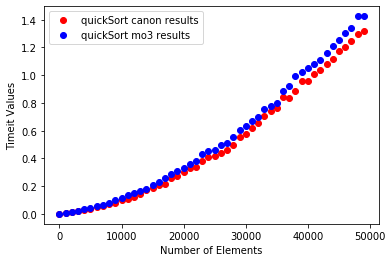

In [4]:
import statistics
import timeit
import random
import matplotlib.pyplot as plt

def quickSort(alist,mo3=False):
   quickSortHelper(alist,0,len(alist)-1)

def medianOf(first,middle,last):
    if first>=middle and first>=last:
        if middle>=last:
            return middle
        else:
            return last
    if middle>=first and middle >=last:
        if first>=last:
            return first
        else:
            return last
    if last>=first and last>=middle:
        if first>=middle:
            return first
        else:
            return middle



def quickSortHelper(alist,first,last,mo3=False):
    
    if first<last:

        splitpoint = partition(alist,first,last)
        quickSortHelper(alist,first,splitpoint-1,mo3)
        quickSortHelper(alist,splitpoint+1,last,mo3)

def partition(alist,first,last,mo3=False):
    pivotvalue=alist[first]
    if mo3:
        #pivotvalue = int(statistics.median([alist[first],alist[last],alist[((last-first)/2)+first]]))
        pivotvalue= medianOf([alist[first],alist[last],alist[((last-first)/2)+first]])
    leftmark = first+1
    rightmark = last

    done = False
    while not done:

        while leftmark <= rightmark and alist[leftmark] <= pivotvalue:
            leftmark = leftmark + 1

        while alist[rightmark] >= pivotvalue and rightmark >= leftmark:
            rightmark = rightmark -1

        if rightmark < leftmark:
            done = True
        else:
            temp = alist[leftmark]
            alist[leftmark] = alist[rightmark]
            alist[rightmark] = temp

    temp = alist[first]
    alist[first] = alist[rightmark]
    alist[rightmark] = temp


    return rightmark


lengths=[x for x in range(0,50000,1000)]
quick=[]
quick_mo3=[]

for length in lengths:
    arr=[random.randrange(100) for x in range(length)]
    arr2=arr
    quickSort_temp=[]
    quickSort_mo3_temp=[]
    for i in range(3):
        quickSort_temp.append((timeit.timeit("quickSort(arr)", setup = "from __main__ import quickSort,arr", number = 1)))
        quickSort_mo3_temp.append((timeit.timeit("quickSort(arr2,True)", setup = "from __main__ import quickSort,arr2", number = 1)))
    quick.append(statistics.mean(quickSort_temp))
    quick_mo3.append(statistics.mean(quickSort_mo3_temp))
    # quick.append((timeit.timeit("quickSort(arr)", setup = "from __main__ import quickSort,arr", number = 1)))
    # quick_mo3.append((timeit.timeit("quickSort(arr,True)", setup = "from __main__ import quickSort,arr", number = 1)))
plt.plot(lengths,quick,'ro', label = "quickSort canon results")
plt.plot(lengths,quick_mo3, 'bo', label = "quickSort mo3 results")
plt.xlabel("Number of Elements")
plt.ylabel("Timeit Values")
plt.legend(loc='upper left')
plt.show()

This experiment sought to determine the respective speeds of a quickSort() function and a modified quickSort_mo3() function. The latter merely incorporating a "Median of 3" approach to pivot value assignment. Rather than take the first value of the list as the pivotvalue, the mo3 function finds the median of the first, last and middle value of the starting list and every subsequent unsorted sublist. This experiment sought to show that the speed of both functions are very similar. This was carried out by generating lists of random integers of sizes ranging from 0-50,000. The functions would be timed 3 times, the output values averaged, stored, and compared in a graph. As you can see, the graph shows slight variance in the O(nlogn) times of these two functions. Ultimately, this verifies the hypothesis that, "Canonic quickSort is as fast as mo3_quickSort when processing large lists of unsorted integers."